#Salary Prediction using Linear Regression



###Step 1:

First we import the necessary libraries required for building the model

In [57]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


###Step 2:

Now we proceed to load the dataset.

In [58]:
data = pd.read_csv("Salary Data.csv")

print("Shape:", data.shape)
print("\nMissing values per column:\n", data.isnull().sum())

data.head()

Shape: (2125, 6)

Missing values per column:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,47.0,Male,PhD,Senior Data Scientist,21.0,180000.0
1,34.0,Male,Master's,Junior Business Analyst,18.0,217300.0
2,30.0,Male,Master's,Senior Marketing Coordinator,18.0,200600.0
3,51.0,Female,Master's,Director of Human Resources,21.0,190000.0
4,36.0,Female,Master's,Senior Product Manager,18.0,222700.0


###Step 3:

In this step, we handle the missing values and clean the dataset

In [59]:
data = data.dropna()
print("After dropping missing values:", data.shape)

After dropping missing values: (2123, 6)


###Step 4:

Now we will use Label Encoder to encode the categorical columns in the dataset.

In [60]:
label_encoders = {}
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le     # store encoder for deployment

print("\nEncoded columns:", list(cat_cols))
joblib.dump(label_encoders, "./saved_encoders/label_encoders.joblib")


Encoded columns: ['Gender', 'Education Level', 'Job Title']


['./saved_encoders/label_encoders.joblib']

###Step 5:

Now we define the features and target.

In [61]:
X = data.drop('Salary', axis=1)
y = data['Salary']

print("Feature columns:", X.columns.tolist())

Feature columns: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']


###Step 6:

Here we split the dataset into train and test.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1698, 5)
Testing set size: (425, 5)


###Step 7:

We inititalize the regression models.

In [63]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
voting = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb)])

models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Voting Regressor": voting
}

###Step 8:

We train and evaluate all the models and then find the best model.

In [64]:
results = []

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    return r2

print("\nTraining models...\n")
best_r2 = -np.inf
best_model = None
best_model_name = None

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")
    r2 = evaluate_model(name, model, X_test, y_test)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name



Training models...

Linear Regression trained successfully!
Random Forest trained successfully!
Gradient Boosting trained successfully!
Voting Regressor trained successfully!


###Step 9:

We save the best model.

In [65]:
print(f"\nBest Model: {best_model_name} with R² = {best_r2:.5f}")
joblib.dump(best_model, "./saved_models/best_salary_model.joblib")
print("Model saved as best_salary_model.joblib")


Best Model: Random Forest with R² = 0.97002
Model saved as best_salary_model.joblib


###Statistics & Visualizations


- Model Performance Summary

In [66]:
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\nModel Performance Summary:\n\n")
print(results_df)


Model Performance Summary:


               Model           MSE          RMSE           MAE        R2
1      Random Forest  1.911611e+08  13826.103467   5949.591104  0.970017
2  Gradient Boosting  2.433607e+08  15600.023082   7060.319285  0.961830
3   Voting Regressor  2.449377e+08  15650.485096   8404.583211  0.961583
0  Linear Regression  6.587836e+08  25666.780946  17246.429417  0.896673


- Correlation heatmap of the Dataset

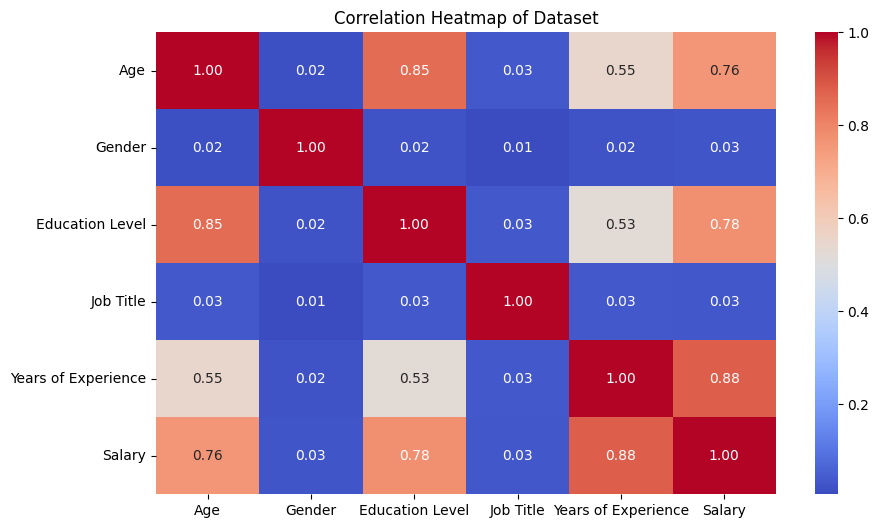

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Dataset")
plt.show()

- Actual vs Predicted plot for the best model

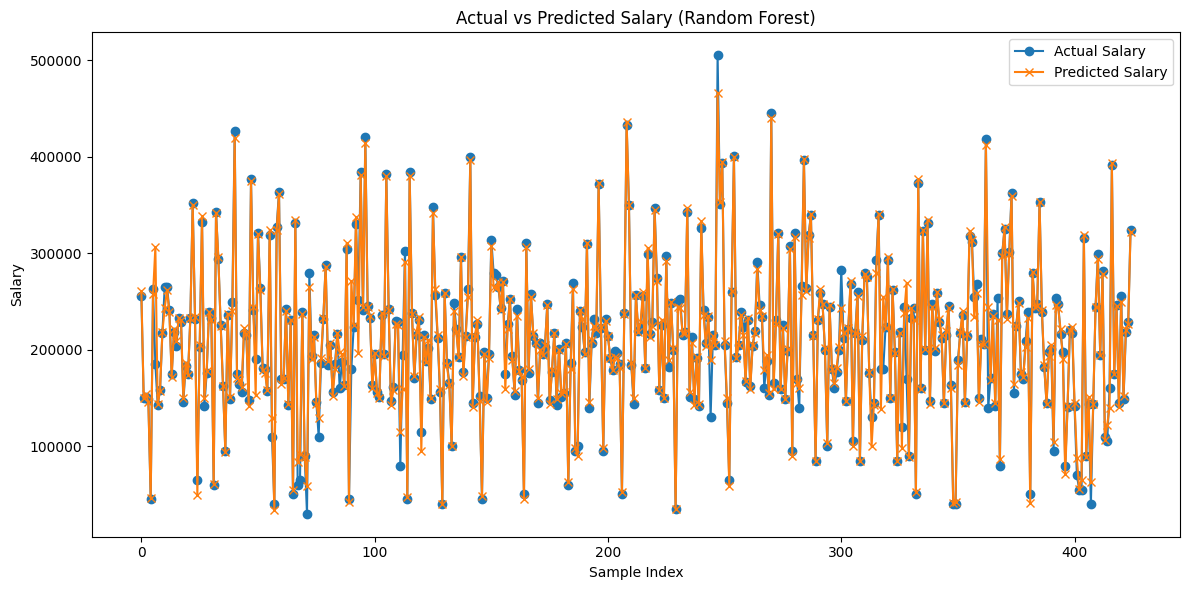

In [68]:
#Actual vs Predicted Salary plot for best model

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Salary", marker='o')
plt.plot(y_pred_best, label="Predicted Salary", marker='x')
plt.title(f"Actual vs Predicted Salary ({best_model_name})")
plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()

- Model Performance Comparison (Based on R2 score)

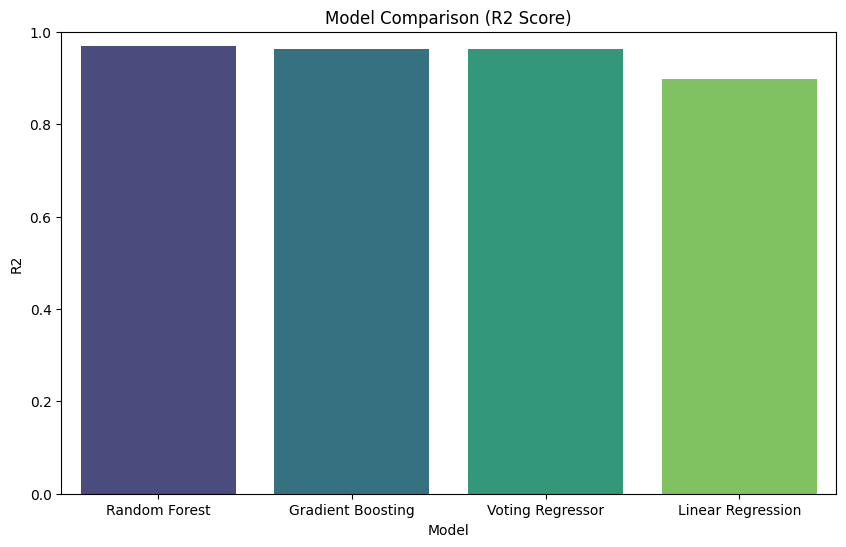

In [69]:

plt.figure(figsize=(10,6))
ax = sns.barplot(data=results_df, x="Model", y="R2", hue="Model", palette="viridis", dodge=False)
ax.set_title("Model Comparison (R2 Score)")
ax.set_ylim(0,1)

plt.show()


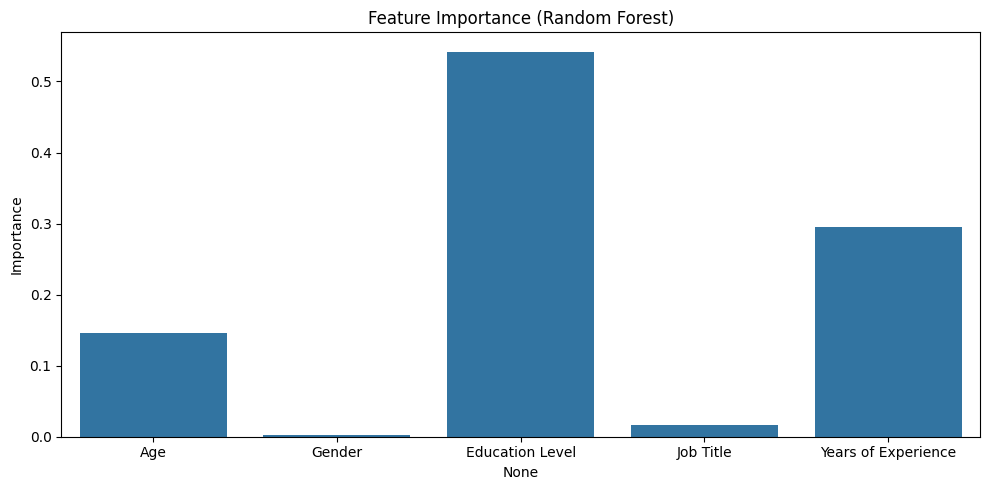

In [70]:
#Feature importance for Random Forest

if "Random Forest" in results_df['Model'].values:
    rf_model = models["Random Forest"]
    importances = rf_model.feature_importances_

    plt.figure(figsize=(10,5))
    sns.barplot(x=X.columns, y=importances)
    plt.title("Feature Importance (Random Forest)")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

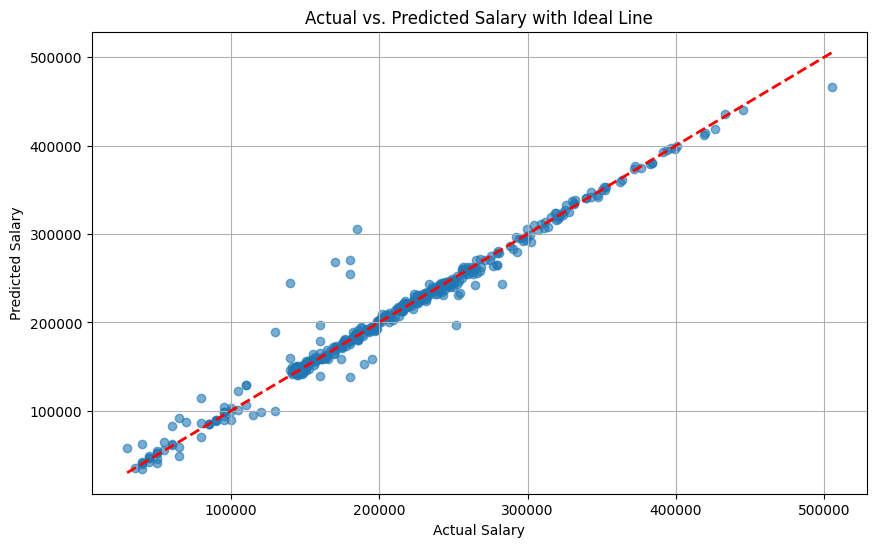

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Salary with Ideal Line')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()